## Задание по библиотекам Pandas и Matplotlib
### Лабораторная работа № 4 по дисциплине "Технологии программирования"

Выполнил: Кухарев Д.А., САПР - 1.3

Подключаем необходимые библиотеки:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn. preprocessing import OneHotEncoder
import seaborn as sns

Скачиваем датасет с информацией о пассажирах Титаника:

In [ ]:
!wget https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

--2023-12-18 18:37:31--  https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/csv]
Saving to: ‘titanic.csv.3’

titanic.csv.3       100%[===================>]  43.19K  --.-KB/s    in 0.03s   

2023-12-18 18:37:32 (1.21 MB/s) - ‘titanic.csv.3’ saved [44225/44225]



Проверяем наличие скачанного датасета:



In [ ]:
!ls

sample_data  titanic.csv  titanic.csv.1  titanic.csv.2	titanic.csv.3


Значения колонок датасета следующие (__в соответствии с информацией с сайта__):
*    Survived Indicator (выжил пассажир или нет)
*    Passenger Class (класс)
*    Name (имя)
*    Sex (пол)
*    Age (возраст)
*    Siblings/Spouses Aboard (есть ли братья, сестры или супруг(а) на борту)
*    Parents/Children Aboard (есть ли родители или дети на борту)
*    Fare paid in £s (цена билета в фунтах стерлингов)

Загружаем данные и формируем Pandas DataFrame:

In [ ]:
df = pd.read_csv('titanic.csv')
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


__С использованием датафрейма нужно выполнить следующие задания__.

1. Определите, содержит ли какой-нибудь столбец датасета пропущенные значения.

In [ ]:
df.isna().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


Датасет не содержит пропусков. Всего в датасете может быть до 887 записи. Каждый столбец содержит полное количество записей.

2. В соответствии с вариантом, определите: Количество женщин старше 50 лет на борту.

In [ ]:
coun_female = len(df[(df['Sex'] == 'female') & (df['Age'] > 50)])
print(f"Количество женщин старше 50 лет: {coun_female}")

Количество женщин старше 50 лет: 18


3. Постройте диаграмму распределения значений цены билета по всем пассажирам. Проинтерпретируйте результат. Можно ли сказать, что в данных наблюдаются выбросы?

Text(0.5, 0, 'Fare')

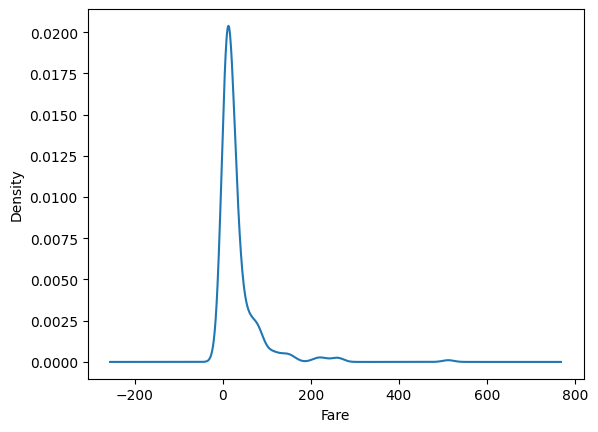

In [ ]:
df['Fare'].plot(kind='kde')

#add x-axis label
plt.xlabel('Fare')

Text(0.5, 0, 'Fare')

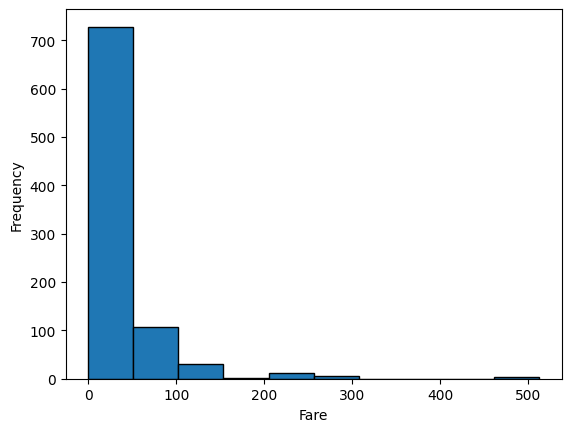

In [ ]:
df['Fare'].plot(kind='hist', edgecolor='black')

#add x-axis label
plt.xlabel('Fare')

4. В соответствии с вариантом, определите, верны ли следующие утверждения. Приведите доказательства ответа.

  1. Чем дороже билет, тем выше вероятность выжить.


Text(0, 0.5, 'Survived')

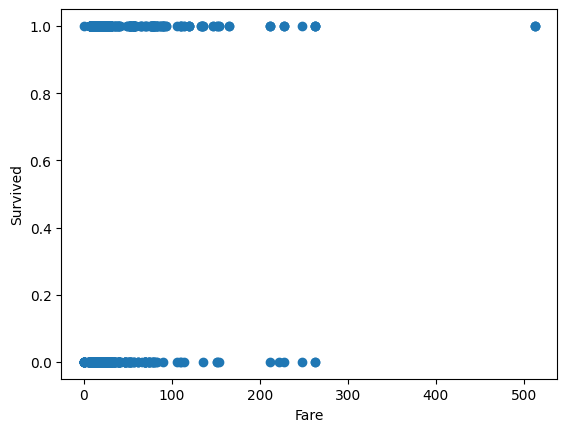

In [ ]:
plt.plot(df['Fare'], df['Survived'], 'o')

plt.xlabel('Fare')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

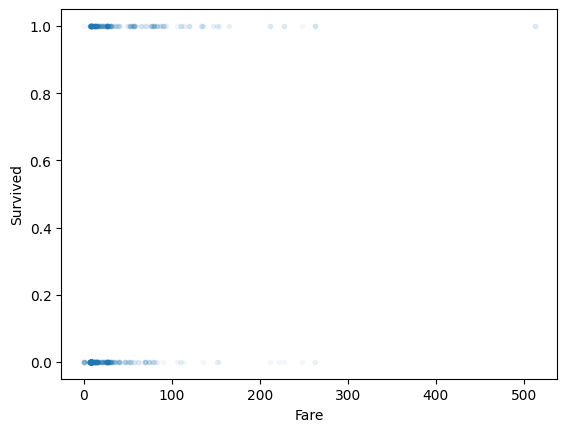

In [ ]:
plt.plot(df['Fare'], df['Survived'], 'o', alpha=0.04, markersize=3)

plt.xlabel('Fare')
plt.ylabel('Survived')

In [ ]:
coefficient_corr = df['Fare']. corr(df['Survived'])
print(f"Коэффициент корреляции: {coefficient_corr}")

Коэффициент корреляции: 0.25617854962896064


Вероятность выжить с более дорогим билетом незначительная.

5. Столбец с именем пассажиров вряд ли будет иметь значение для последующего анализа данных. Удалите этот столбец из датафрейма. Выведите на экран полученный датасет.

In [ ]:
df.drop('Name', axis= 1 , inplace= True )
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000
883,1,1,female,19.0,0,0,30.0000
884,0,3,female,7.0,1,2,23.4500
885,1,1,male,26.0,0,0,30.0000


6. Столбец "пол пассажира" является категориальным. Закодируйте его с помощью ohe-hot-кодирования (OHE). Выведите на экран полученный датасет.

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder. fit_transform(df[['Sex']]). toarray ())

df = df.join (encoder_df)
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,0,1
0,0,3,male,22.0,1,0,7.2500,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,1.0,0.0
2,1,3,female,26.0,0,0,7.9250,1.0,0.0
3,1,1,female,35.0,1,0,53.1000,1.0,0.0
4,0,3,male,35.0,0,0,8.0500,0.0,1.0
...,...,...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000,0.0,1.0
883,1,1,female,19.0,0,0,30.0000,1.0,0.0
884,0,3,female,7.0,1,2,23.4500,1.0,0.0
885,1,1,male,26.0,0,0,30.0000,0.0,1.0


In [ ]:
#Переименование новых столбцов
df.rename(columns={ 1: 'Male', 0: 'Female'}, inplace=True)
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Female,Male
0,0,3,male,22.0,1,0,7.2500,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,1.0,0.0
2,1,3,female,26.0,0,0,7.9250,1.0,0.0
3,1,1,female,35.0,1,0,53.1000,1.0,0.0
4,0,3,male,35.0,0,0,8.0500,0.0,1.0
...,...,...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000,0.0,1.0
883,1,1,female,19.0,0,0,30.0000,1.0,0.0
884,0,3,female,7.0,1,2,23.4500,1.0,0.0
885,1,1,male,26.0,0,0,30.0000,0.0,1.0


In [ ]:
#Удаление исходной категориальной переменной
# df.drop('Sex', axis= 1 , inplace= True )
# df

7. Постройте диаграмму рассеяния между признаками "Возраст" и "Цена билета". Проинтерпретируйте ответ.

<Axes: xlabel='Age', ylabel='Fare'>

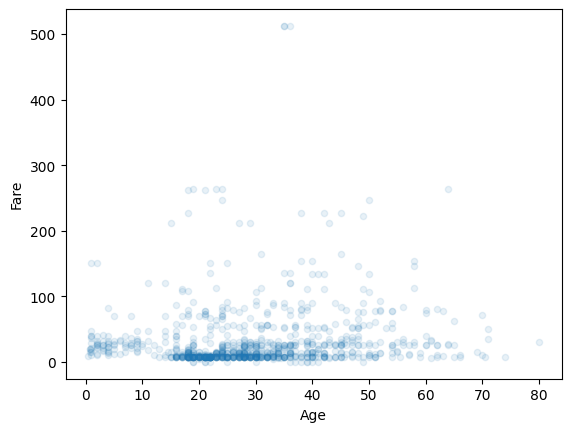

In [ ]:
df.plot.scatter (x = 'Age', y = 'Fare', alpha=0.1)


Основной возраст пассажиров Титаника - 15-35 лет. Большая часть билетов имеет стоимость не более 50 фунтов стерлингов. Люди старше 65 лет покупали билеты не дороже 100 фунтов стерлингов. Самые дорогие билеты были куплены в основном людьми в возрасте от 15 до 25 лет. Стоимость билета не зависит от возраста.

8. Отнормируйте значения признаков "Возраст" и "Цена билета". Выведите на экран полученный датасет.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Sex                      887 non-null    object 
 3   Age                      887 non-null    float64
 4   Siblings/Spouses Aboard  887 non-null    int64  
 5   Parents/Children Aboard  887 non-null    int64  
 6   Fare                     887 non-null    float64
 7   Female                   887 non-null    float64
 8   Male                     887 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 62.5+ KB


In [ ]:
df['Age_norm'] = df['Age']
df['Fare_norm'] = df['Fare']
#Взяты все строчки столбцов 9(Age_norm) и 10(Fare_norm)
x = df.iloc[:, [9,10]]
#Нормирование значений
norm_df = (x-x. min ())/ (x. max () - x. min ())

df.iloc[:, [9,10]] = norm_df
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Female,Male,Age_norm,Fare_norm
0,0,3,male,22.0,1,0,7.2500,0.0,1.0,0.271174,0.014151
1,1,1,female,38.0,1,0,71.2833,1.0,0.0,0.472229,0.139136
2,1,3,female,26.0,0,0,7.9250,1.0,0.0,0.321438,0.015469
3,1,1,female,35.0,1,0,53.1000,1.0,0.0,0.434531,0.103644
4,0,3,male,35.0,0,0,8.0500,0.0,1.0,0.434531,0.015713
...,...,...,...,...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000,0.0,1.0,0.334004,0.025374
883,1,1,female,19.0,0,0,30.0000,1.0,0.0,0.233476,0.058556
884,0,3,female,7.0,1,2,23.4500,1.0,0.0,0.082684,0.045771
885,1,1,male,26.0,0,0,30.0000,0.0,1.0,0.321438,0.058556


9. Постройте гистограммы распределения пассажиров по полу и по возрасту для каждого класса. Расположите гистограммы одна под другой. Оси абсцисс должны быть однаковыми.

Гистограмма для первого класса.

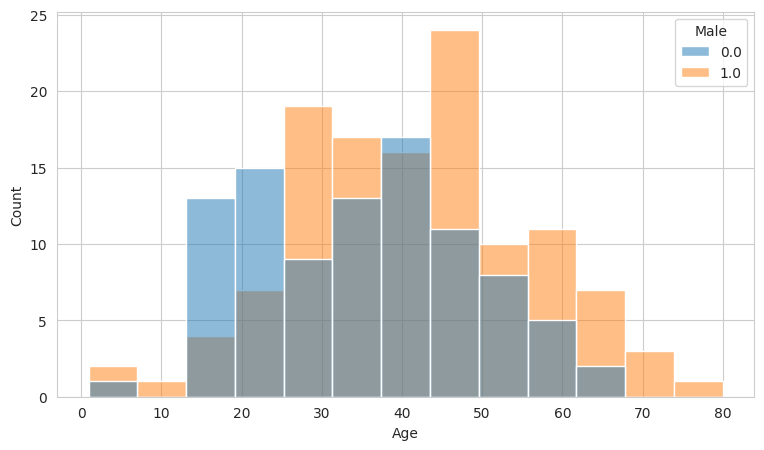

In [ ]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(9, 5))
    sns.histplot(data=df[df['Pclass'] == 1], x='Age', hue='Male')

Гистограмма для второго класса.

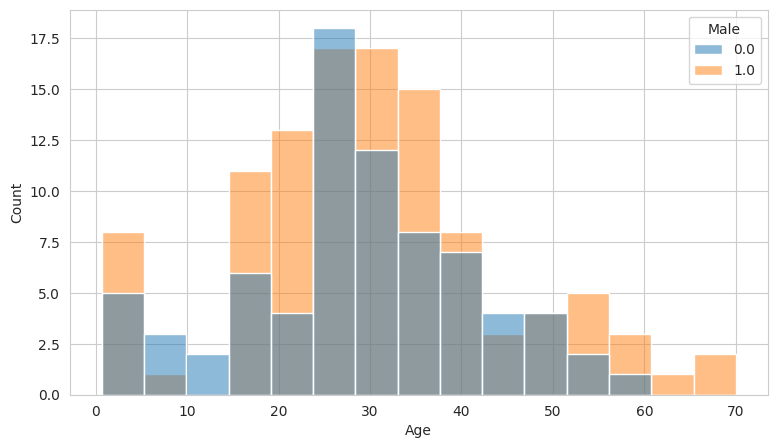

In [ ]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(9, 5))
    sns.histplot(data=df[df['Pclass'] == 2], x='Age', hue='Male')

Гистограмма для третьего класса.

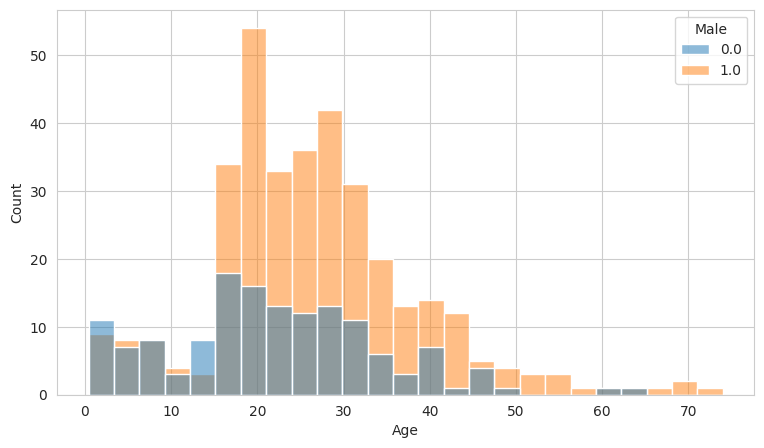

In [ ]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(9, 5))
    sns.histplot(data=df[df['Pclass'] == 3], x='Age', hue='Male')

10. Сделайте выводы по работе.

В рамках лабораторной работы были выполнены следующие пункты:
1. Использована библиотека pandas
2. Использована библиотека numpy
3. Проведён анализ датасета по титанику
4. Построены, необходимые по заданию, графики и диаграммы
5. Были получены ответы на вопросы заданий